In [13]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import xarray as xr
import numpy as np
import pandas as pd
from acIndUtils import acIndUtils, acIndWavesUtils, acIndWavesGraphicUtils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
"""
Loading the perimeter of the area of interest and setting a few parameters
"""
#areaPerimeter = pd.read_csv("areas/areaNAdriatic.csv")
areaPerimeter = pd.read_csv("areas/areaAdriatic.csv")
verticalLevels = -np.arange(0, 1000, 2)

In [15]:
rawDataFileSpec = acIndUtils.acNcFileSpec(
    ncFileName="/home/lmentaschi/DATA/cmemsWavesReanalysisAdriaclim/Hs/*_hourly_reanalsis_significant_wave_height_AdriaticSea.nc", 
    varName="VHM0", xVarName="longitude", yVarName="latitude", tVarName="time" )
rawDataFileSpec.printSpec()
ncMonthlyFileSpec = acIndUtils.acCloneFileSpec(rawDataFileSpec, ncFileName="swhMonthlyData.nc")
ncClippedDataFileSpec = acIndUtils.acCloneFileSpec(rawDataFileSpec, ncFileName="swhClippedData.nc")
annualMapsNcFileSpec = acIndUtils.acCloneFileSpec(rawDataFileSpec, ncFileName="swhAnnual.nc")
ncWinterFileSpec = acIndUtils.acCloneFileSpec(rawDataFileSpec, ncFileName="swhWinter.nc")
ncSummerFileSpec = acIndUtils.acCloneFileSpec(rawDataFileSpec, ncFileName="swhSummer.nc")
swhAnnualMapsNcFileSpec = acIndUtils.acCloneFileSpec(rawDataFileSpec, ncFileName="swhAnnual.nc")
swhWinterNcFileSpec = acIndUtils.acCloneFileSpec(rawDataFileSpec, ncFileName="swhWinter.nc")
swhSummerNcFileSpec = acIndUtils.acCloneFileSpec(rawDataFileSpec, ncFileName="swhSummer.nc")
swhTrendMapNcSpec = acIndUtils.acCloneFileSpec(annualMapsNcFileSpec, ncFileName="swhTrendMap.nc")
swhMeanTimeSeriesCsv = "swhMeanTimeSeries.csv"

  ncFileName: /home/lmentaschi/DATA/cmemsWavesReanalysisAdriaclim/Hs/*_hourly_reanalsis_significant_wave_height_AdriaticSea.nc
  varName: VHM0
  xVarName: longitude
  yVarName: latitude
  zVarName: 
  tVarName: time


**Generating the pre-aggregates**

In [ ]:
"""
Aggregating by month: getting the mean SWH and counting moderate and rough conditions.
This step may take a lot of time.
"""
print(acIndUtils.acNcFile)
acIndWavesUtils.collectMonthlyHsData(rawDataFileSpec, ncMonthlyFileSpec)

<class 'acIndUtils.acIndUtils.acNcFile'>
  initializing ...
    elaborating 1993-01-01 00:00:00
      1993-01-01 00:00:00
      1993-01-01 01:00:00
      1993-01-01 02:00:00
      1993-01-01 03:00:00
      1993-01-01 04:00:00
      1993-01-01 05:00:00
      1993-01-01 06:00:00


In [28]:
"""
clipping the input data over the area of interest (may require some time)
"""
otherVarNames = ["roughSeaCount", "moderSeaCount"] # we need to clip also the count of rough and moderate sea days
clippedData = acIndUtils.acClipDataOnRegion(ncMonthlyFileSpec, areaPerimeter, ncClippedDataFileSpec.ncFileName,
                                           otherVarNames=otherVarNames)
print("done")


CMEMS SST Dimension: <acIndUtils.acIndUtils.acNcFileSpec object at 0x7fd7419cc9a0>
Clipped Area Dimensions:            LON        LAT
0    19.641391  39.744436
1    18.375273  39.798191
2    18.391109  39.816245
3    18.399336  39.899609
4    18.399436  39.936100
..         ...        ...
413  19.694582  39.794718
414  19.673055  39.793055
415  19.650836  39.772500
416  19.640000  39.756664
417  19.641391  39.744436

[418 rows x 2 columns]
preselecting the mininumn containing rectangle, saving to  swhClippedData.nc
clipping over the polygon and storing frame by frame (may take a while ...)
  done 95 %
done


In [29]:
"""
Generating the temporary nc file with the annual means
"""
acIndUtils.acGenerateAnnualMeanMaps(ncClippedDataFileSpec, swhAnnualMapsNcFileSpec.ncFileName)
print("done")

done


In [30]:
"""
Generating the temporary nc file with the winter means
"""
acIndUtils.acGenerateSeasonalWinter(ncClippedDataFileSpec, swhWinterNcFileSpec.ncFileName)
print("done")

done


In [31]:
"""
Generating the temporary nc file with the summer means
"""
acIndUtils.acGenerateSeasonalSummer(ncClippedDataFileSpec, swhSummerNcFileSpec.ncFileName)
print("done")

done


In [32]:
"""
Generating the temporary csv file with the daily time series
"""
clippedData1Dcsv = acIndUtils.acGenerateMeanTimeSeries(ncClippedDataFileSpec, swhMeanTimeSeriesCsv)
print("done")

done


In [33]:
"""
Generating the temporary nc file with the map of trend.
"""
acIndUtils.acComputeSenSlope3DMap(swhAnnualMapsNcFileSpec, swhTrendMapNcSpec.ncFileName)
print("done")

done


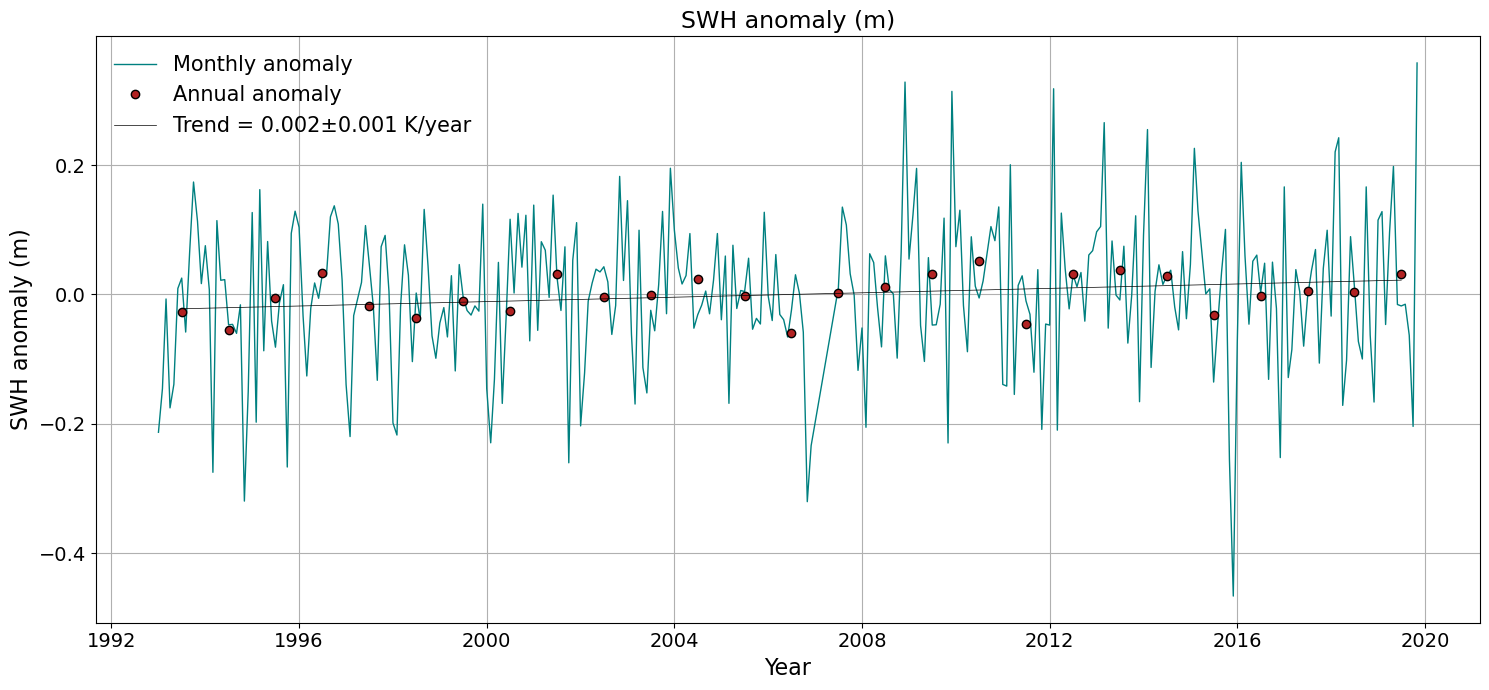

In [34]:
"""
Time series of SWH anomaly.
"""
figSSTTimeSeries = acIndWavesGraphicUtils.acPlotTimeSeries(swhMeanTimeSeriesCsv, "SWH anomaly (m)")

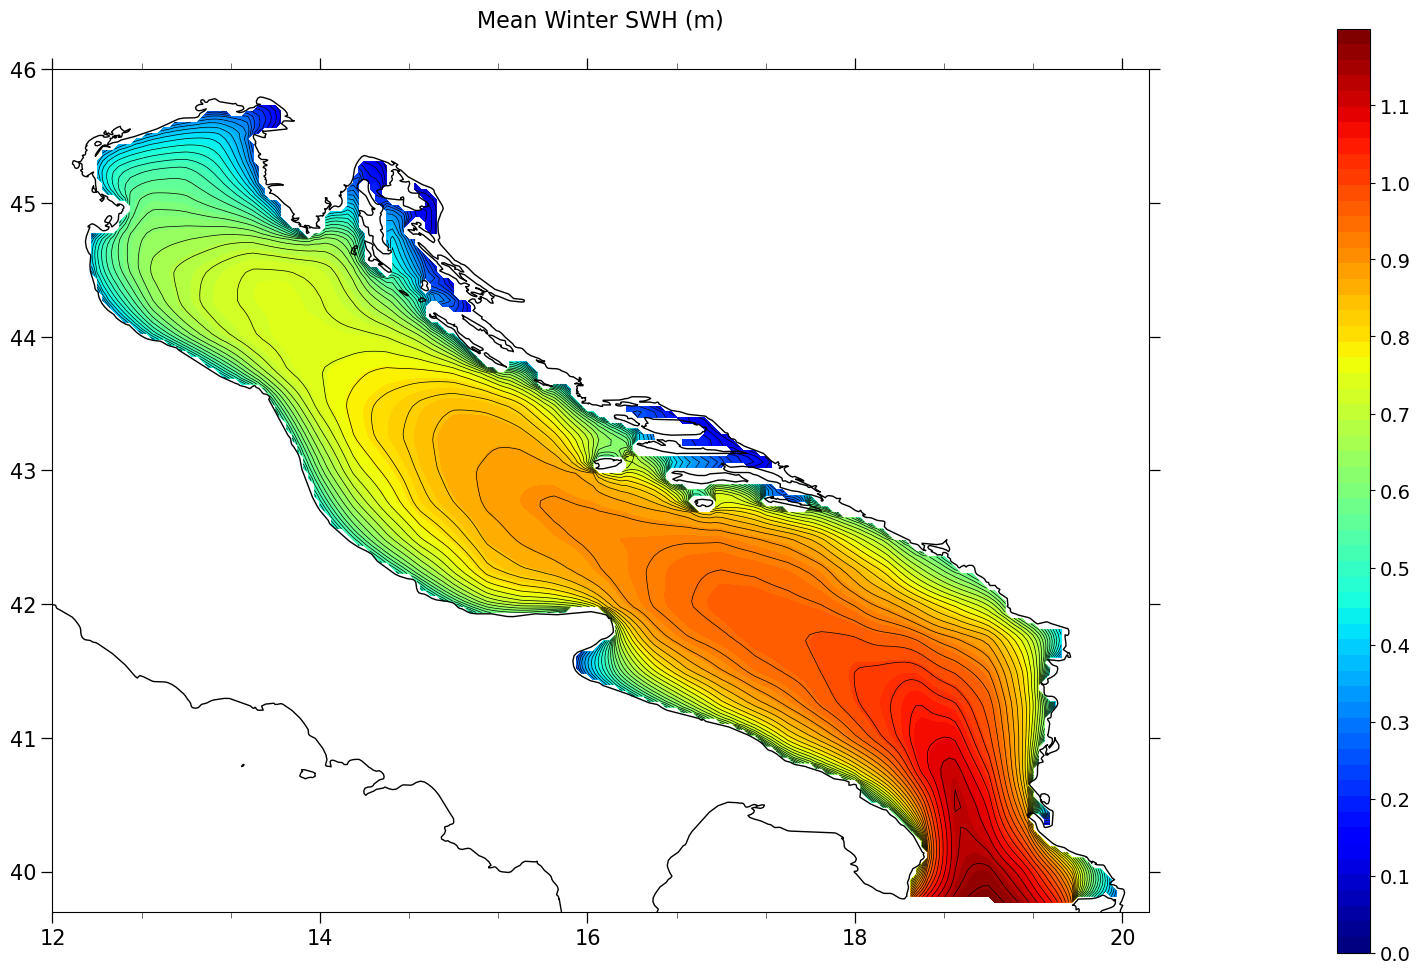

In [35]:
"""
Map of Winter mean SWH. Season defined as in Artegiani et al. 1997 (JFMA).
"""
winterPlot = acIndWavesGraphicUtils.plotMeanMap(swhWinterNcFileSpec, "Mean Winter SWH (m)")

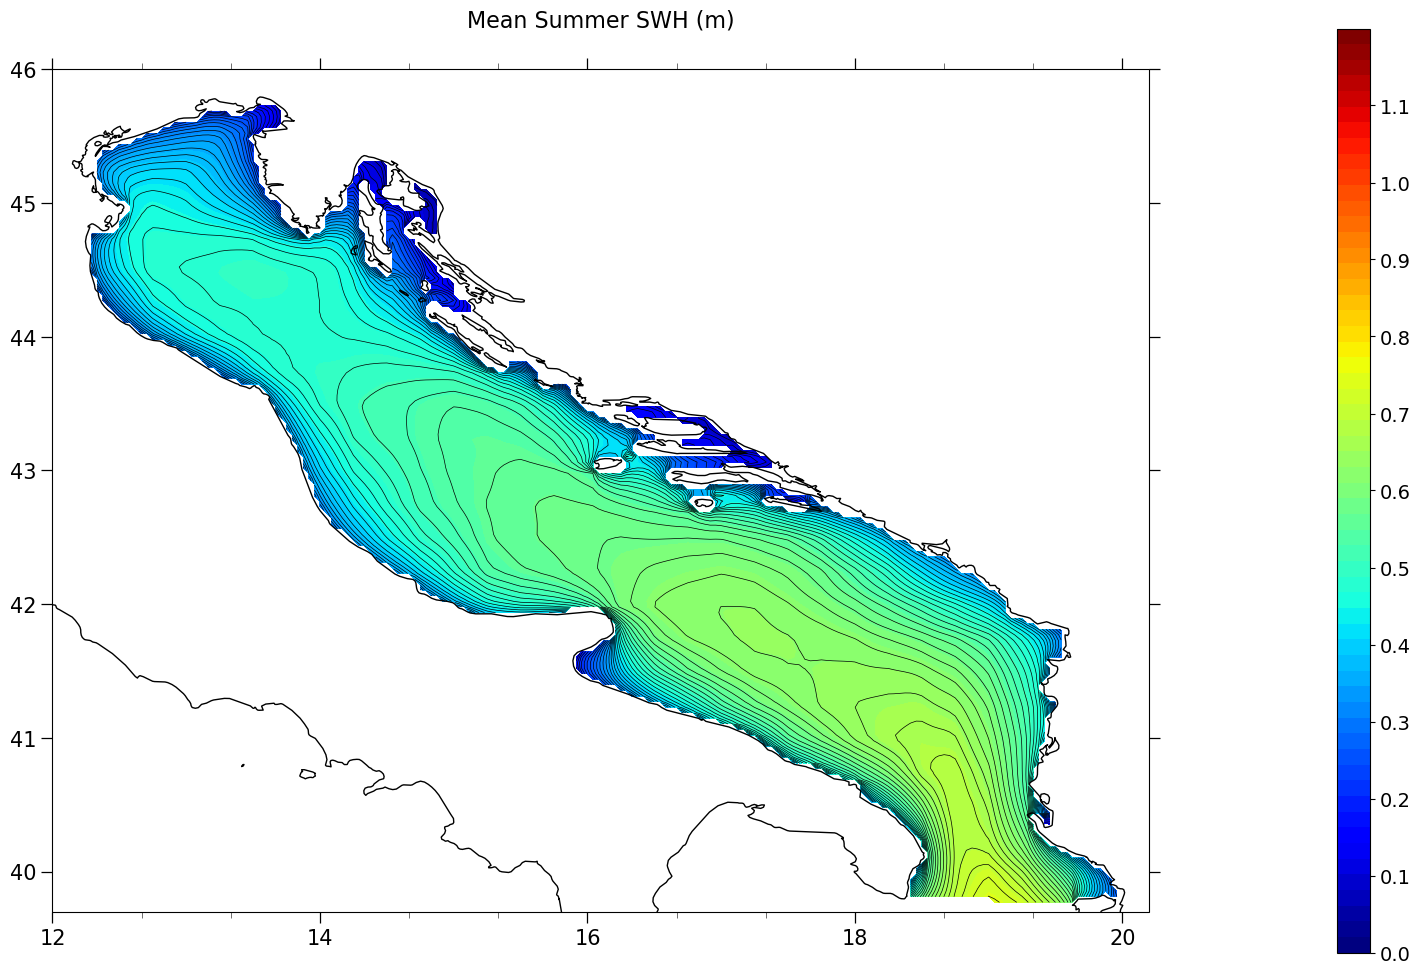

In [36]:
"""
Map of Summer mean SWH. Season defined as in Artegiani et al. 1997 (JFMA).
"""
winterPlot = acIndWavesGraphicUtils.plotMeanMap(swhSummerNcFileSpec, "Mean Summer SWH (m)")

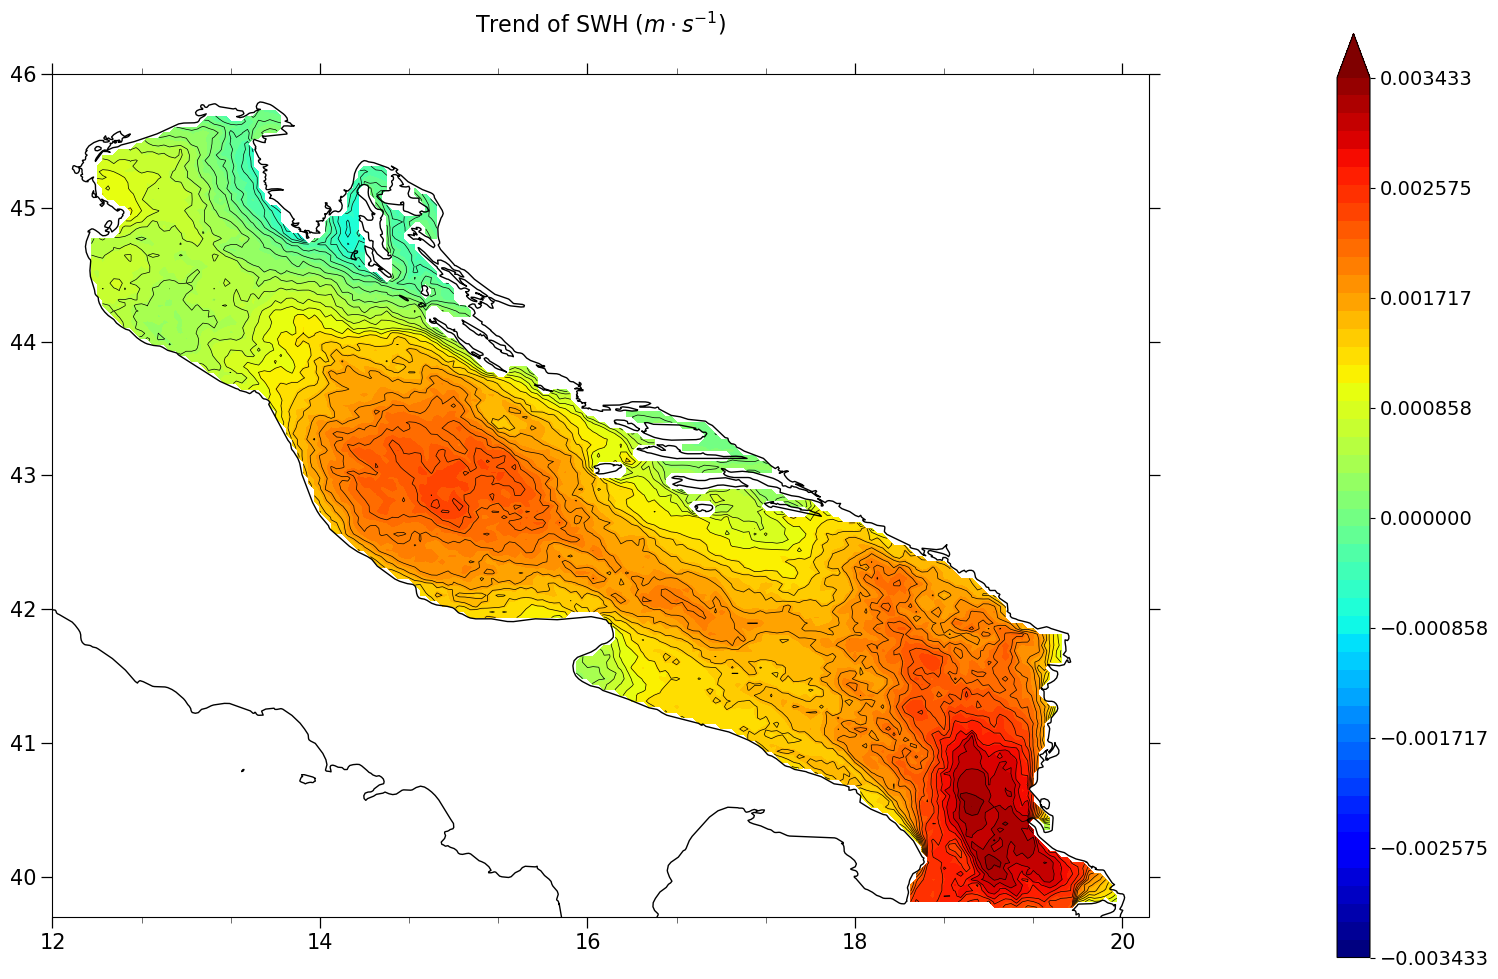

In [37]:
# plotting the trend
trendMapPlot = acIndWavesGraphicUtils.plotTrendMap(swhTrendMapNcSpec, "Trend of SWH ($m \cdot s^{-1}$)")